In [1]:
from src.linear_hashing import LinearHashing
from numpy import arange
from random import sample, randint
from math import ceil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def generate_keys(amount, start=0, end=10**5):
    random_numbers = set()
    while len(random_numbers) < amount:
        random_numbers.add(randint(start, end))

    return list(random_numbers)


def average(numbers):
    return sum(numbers) / len(numbers)


def linePlot(
    data, x, y, y_range, color=None, markers="o", title=None, y_tick_interval=None, figsize=None
):
    if not color:
        plot_data = data.groupby(x)[y].mean().reset_index()
    else:
        plot_data = data.groupby([x, color])[y].mean().reset_index()

    if figsize:
        plt.figure(figsize=(figsize[0], figsize[1]))

    sns.set()
    sns.lineplot(
        data=plot_data,
        x=x,
        y=y,
        marker=markers,
        hue=color,
    ).set(title=title or f"{y} em funcao do {x}", ylim=y_range)

    if y_tick_interval:
        # Create a list of tick positions at the specified interval
        y_ticks = arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval)

        plt.gca().set_yticks(y_ticks)

    plt.show()


test_ps = [1, 5, 10, 20, 50]
test_alphas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Desempenho quanto ao espaço

In [2]:
data = []

for p in test_ps:
    for alpha in test_alphas:
        alphas = []
        p_stars = []

        for _ in range(10):
            linear_hashing = LinearHashing(p, alpha)
            keys = generate_keys(p * 1000)
            for key in keys:
                linear_hashing.insert(key)

            alphas.append(linear_hashing.alpha)
            p_stars.append(linear_hashing.p_star)

        avg_alpha = average(alphas)
        avg_p_star = average(p_stars)

        data.append([p, alpha, avg_alpha, avg_p_star])

data = pd.DataFrame(data, columns=["p", "alpha máximo", "alpha médio", "p* médio"])
data

,p,alpha máximo,alpha médio,p* médio
0,1,0.2,0.199984,1.667424
1,1,0.3,0.299904,1.620842
2,1,0.4,0.399952,1.535438
3,1,0.5,0.499975,1.579617
4,1,0.6,0.599700,1.572895
5,1,0.7,0.699790,1.679670
6,1,0.8,0.799808,1.851603
7,1,0.9,0.899119,2.113219
8,5,0.2,0.200000,1.176286
9,5,0.3,0.299931,1.109128


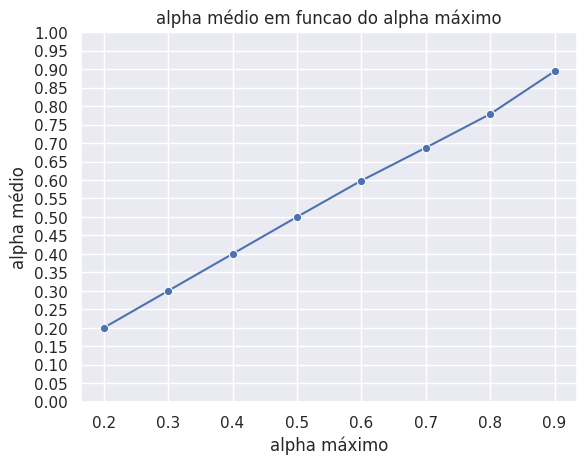

In [3]:
linePlot(data, x="alpha máximo", y="alpha médio", y_range=[0, 1],y_tick_interval=0.05)

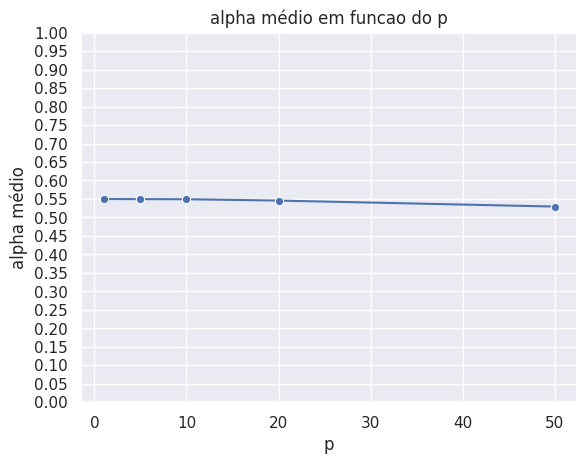

In [4]:
linePlot(data, x="p", y="alpha médio", y_range=[0, 1],y_tick_interval=0.05)

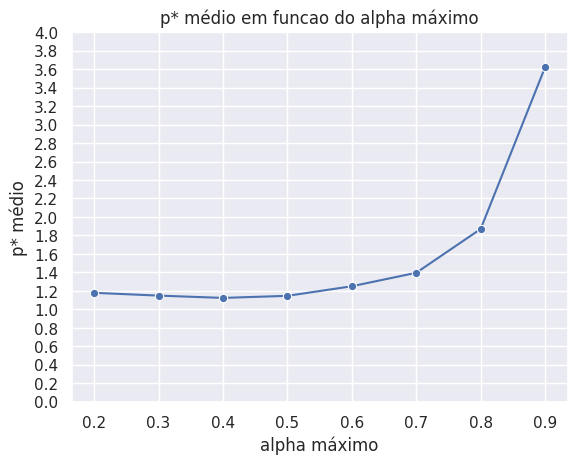

In [5]:
linePlot(data, x="alpha máximo", y="p* médio", y_range=[0, 4],y_tick_interval=0.2)

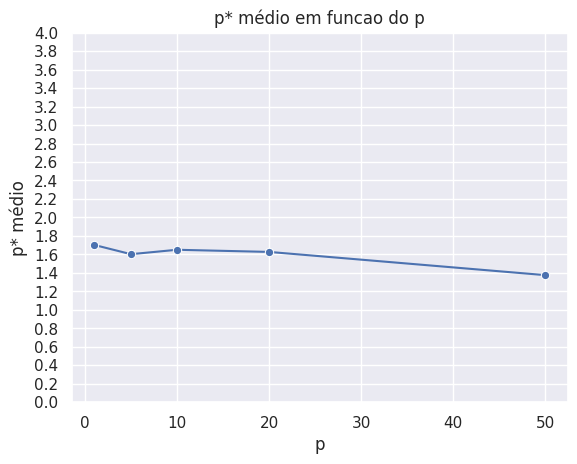

In [6]:
linePlot(data, x="p", y="p* médio", y_range=[0, 4],y_tick_interval=0.2)

# Desempenho quanto ao número médio de acessos


In [7]:
data = []

for p in test_ps:
    for alpha in test_alphas:
        S_avg_accesses = []
        C_avg_accesses = []

        for _ in range(10):
            linear_hashing = LinearHashing(p, alpha)

            size = p * 1000
            sample_size = ceil(size * 0.20)

            random_keys = generate_keys(size + sample_size)

            keys = random_keys[sample_size:]

            for key in keys:
                linear_hashing.insert(key)

            S_sample = random_keys[:sample_size]
            C_sample = sample(keys, sample_size)

            S_sample_search_accesses = []
            C_sample_search_accesses = []
            for i in range(sample_size):
                S_sample_search_accesses.append(linear_hashing.search(S_sample[i])[1])
                C_sample_search_accesses.append(linear_hashing.search(C_sample[i])[1])

            S_avg_accesses.append(average(S_sample_search_accesses))
            C_avg_accesses.append(average(C_sample_search_accesses))

        data.append([p, alpha, average(S_avg_accesses), "Sem sucesso"])
        data.append([p, alpha, average(C_avg_accesses), "Com sucesso"])


data = pd.DataFrame(
    data, columns=["p", "alpha máximo", "número médio de acessos", "tipo"]
)
data

,p,alpha máximo,número médio de acessos,tipo
0,1,0.2,0.01450,Sem sucesso
1,1,0.2,1.25300,Com sucesso
2,1,0.3,0.02250,Sem sucesso
3,1,0.3,1.27300,Com sucesso
4,1,0.4,0.02450,Sem sucesso
...,...,...,...,...
75,50,0.7,22.41422,Com sucesso
76,50,0.8,47.61824,Sem sucesso
77,50,0.8,24.62909,Com sucesso
78,50,0.9,139.00100,Sem sucesso


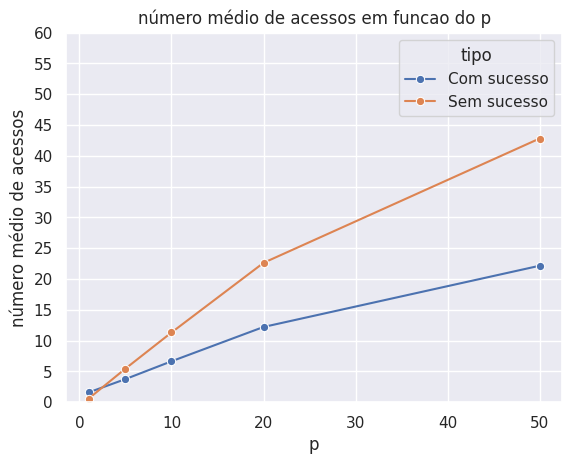

In [8]:
linePlot(data, x="p", y="número médio de acessos", y_range=[0, 60], color="tipo", y_tick_interval=5)

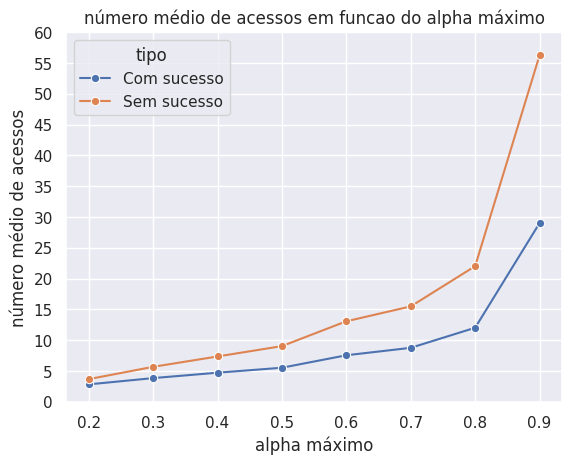

In [9]:
linePlot(
    data, x="alpha máximo", y="número médio de acessos", y_range=[0, 60], color="tipo", y_tick_interval=5
)

# Desempenho durante a inclusão dos n registros


In [10]:
data = []

p = 10
max_alpha = 0.85

alphas = []
p_stars = []
l_maxes = []


def iteration_averages(arr):
    return [sum(item[i] for item in arr) / len(arr) for i in range(len(arr[0]))]


for _ in range(10):
    i_alphas = []
    i_p_stars = []
    i_l_maxes = []

    linear_hashing = LinearHashing(p, max_alpha)
    keys = generate_keys(10000)
    for key in keys:
        linear_hashing.insert(key)
        i_alphas.append(linear_hashing.alpha)
        i_p_stars.append(linear_hashing.p_star)
        i_l_maxes.append(linear_hashing.l_max)

    alphas.append(i_alphas)
    p_stars.append(i_p_stars)
    l_maxes.append(i_l_maxes)


average_ith_alphas = iteration_averages(alphas)
average_ith_p_stars = iteration_averages(p_stars)
average_ith_l_maxes = iteration_averages(l_maxes)


for i in range(len(average_ith_alphas)):
    data.append([i + 1, average_ith_alphas[i], "alpha médio"])
    data.append([i + 1, average_ith_p_stars[i], "p*"])
    data.append([i + 1, average_ith_l_maxes[i], "L max"])

data = pd.DataFrame(data, columns=["i", "valores observados", "tipo"])
data

,i,valores observados,tipo
0,1,0.050000,alpha médio
1,1,1.000000,p*
2,1,1.000000,L max
3,2,0.100000,alpha médio
4,2,1.000000,p*
...,...,...,...
29995,9999,2.913105,p*
29996,9999,6.000000,L max
29997,10000,0.847821,alpha médio
29998,10000,2.913105,p*


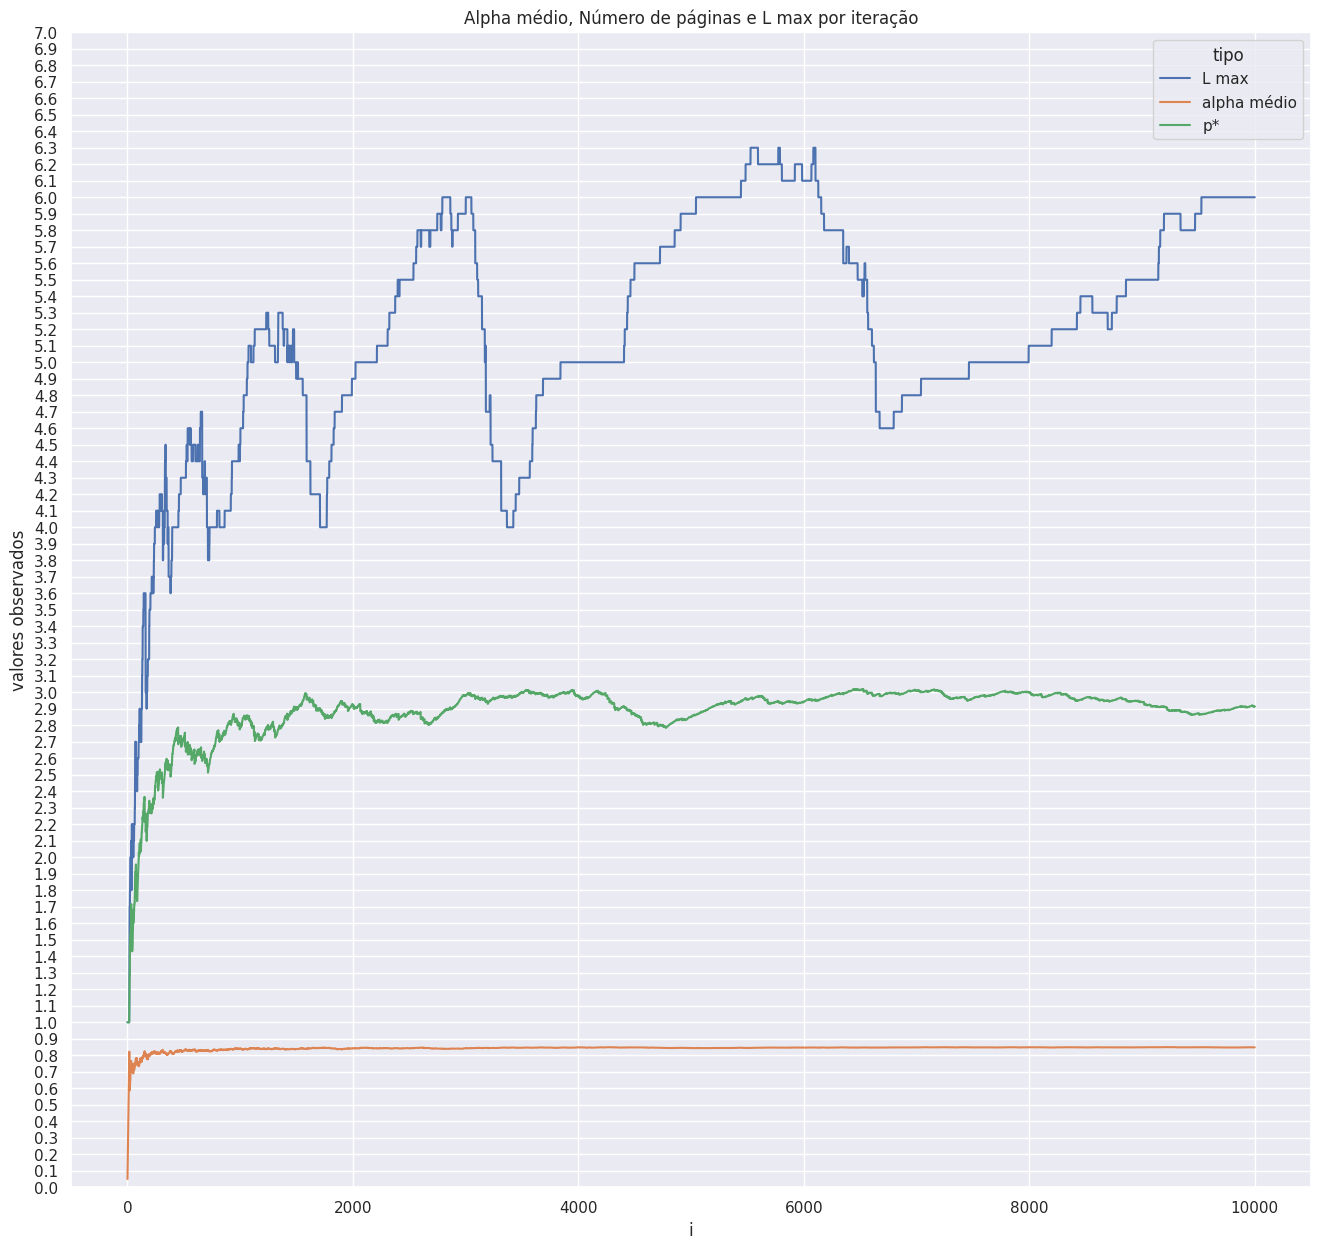

In [11]:
linePlot(
    data,
    x="i",
    y="valores observados",
    y_range=[0,7],
    color="tipo",
    markers=None,
    title="Alpha médio, Número de páginas e L max por iteração",
    y_tick_interval=0.1,
    figsize=[16,15]
)